# TASK 1

### Importing the required libraries

In [1]:
#Importing the required Libraries 
import pandas as pd 
import numpy as np 

### Importing the test dataset

In [2]:
df1 = pd.read_csv("UMD_TEST.txt", delimiter = '\s+', header = None)

In [3]:
y = df1.iloc[:  , 0]
X = df1.iloc[: , 1:]

### Splitting up the dataset into test and train with train_size = 75% and test_size = 25%

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [5]:
#Doing some extra preprocessing of removing the randomly arrranged indexes from test_train split function in order to get the 
#Accurate results
X_train = X_train.reset_index()
X_test = X_test.reset_index()
y_train = y_train.reset_index()
y_test = y_test.reset_index()

In [6]:
#Dropping out the randomly arranged indexes generated from the train_test_split method
X_train.drop(columns = ['index'], inplace = True, axis =1 )
y_train.drop(columns = ['index'], inplace = True, axis =1 )
X_test.drop(columns = ['index'], inplace = True, axis =1 )
y_test.drop(columns = ['index'], inplace = True, axis =1 )

### Converting the datasets into the Numpy arrays so that they can be processed by the DTW Distance calculation function

In [7]:
X_arr = X_train.to_numpy()
X_test_arr = X_test.to_numpy()

### DTW Function for calculating the distance

In [8]:
def dtw(s, t, window):
    n, m = len(s), len(t)
    w = np.max([window, abs(n-m)]) # warping cannot be less than the difference in lengths. 
    dtw_matrix = np.zeros((n+1, m+1))
    
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            dtw_matrix[i, j] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix[-1,-1]

In [9]:
# One extra function defined for the Inverse dictionary mapping
def fetch_keys(dict_1, value):
    return [key for key, val in dict_1.items() if val == value]

# Code for Implementation of the Simple 1-NN Classifier using the DTW function for Distance calculation
### Steps involved in the code are as below
#### 1. First used nested for loop in order to calculate the distance of each time-series element in X_test with each of the time-series element in X_train
#### 2. For each item in X_test,  I stored the index of the element for X_train  which is having the lowest distance with that X_test element
#### 3. Finally using inverse mapping of the dictionary fetched the Class value for that index of the X_train element from the y_train dataframe
#### 4. Calculated the Accuracy for the step by comparing the Actual values in y_test to that of the predicted values through this method.

### NOTE. - I used the While loop for 20 Counts in order to check which window has the best accuracy for  this DTW Model which basically helped to calculate the Accuracy for each window size from 1 - 20 , Which will enable me to check the accuracy trend with the window size for the DTW Model and help me to choose the best Window size in terms of accuracy

In [10]:
# This is the code being Implemented in order for the DTW Code to be implemented
count_1 = 20
accuracy ={}
while count_1 >0:
    final = []
    #This piece of code was to get the predicted indexes for the y_train which has the least distance with the X_train data
    for i in range(0, len(X_test_arr)):
        a= {}
        for j in range(0, len(X_arr)):
            a[j] = dtw(X_test_arr[i], X_arr[j], count_1)
        final.append(fetch_keys(a, sorted(a.values())[0])[0])  

    #This piece of code was to get the predicted values by maping those already got indexes from the previous step to the actual
    #class of y_train


    final_1 = []
    for i in range(0,len(final)):
        final_1.append(y_train[0][final[i]])
    df3 = pd.DataFrame (final_1, columns = ['Predicted'])


    #This piece of code was to predict the accuracy of the code based on the predicted and the actual values
    count = 0
    for i in range(0,len(df3)):
        if df3.iloc[i][0] == y_test[0][i]:
            count = count+1

    #This piece of code is for storing the accuracy for each window size in a dictionary named accuracy
    accuracy[count_1]  = float ((count/len(df3))*100)
    print('Accuracy for Window size', count_1, 'is --'  , accuracy[count_1])
    count_1 = count_1 -1 

Accuracy for Window size 20 is -- 94.44444444444444
Accuracy for Window size 19 is -- 94.44444444444444
Accuracy for Window size 18 is -- 94.44444444444444
Accuracy for Window size 17 is -- 94.44444444444444
Accuracy for Window size 16 is -- 94.44444444444444
Accuracy for Window size 15 is -- 94.44444444444444
Accuracy for Window size 14 is -- 94.44444444444444
Accuracy for Window size 13 is -- 94.44444444444444
Accuracy for Window size 12 is -- 94.44444444444444
Accuracy for Window size 11 is -- 94.44444444444444
Accuracy for Window size 10 is -- 94.44444444444444
Accuracy for Window size 9 is -- 94.44444444444444
Accuracy for Window size 8 is -- 94.44444444444444
Accuracy for Window size 7 is -- 94.44444444444444
Accuracy for Window size 6 is -- 97.22222222222221
Accuracy for Window size 5 is -- 97.22222222222221
Accuracy for Window size 4 is -- 94.44444444444444
Accuracy for Window size 3 is -- 91.66666666666666
Accuracy for Window size 2 is -- 91.66666666666666
Accuracy for Window 

In [11]:
df4 = pd.DataFrame.from_dict(accuracy , orient = 'index')
df4 = df4.reset_index()
df4.rename(columns = {0:'Accuracy'}, inplace = True)
df4.rename(columns = {'index':'Window'}, inplace = True)

In [12]:
#This is the dataframe containing the Accuracy scores vs the Window Size
df4

,Window,Accuracy
0,20,94.444444
1,19,94.444444
2,18,94.444444
3,17,94.444444
4,16,94.444444
5,15,94.444444
6,14,94.444444
7,13,94.444444
8,12,94.444444
9,11,94.444444


### Plotting the Window Size vs Accuracy of the Classifier Score in order to determined the best Window Size

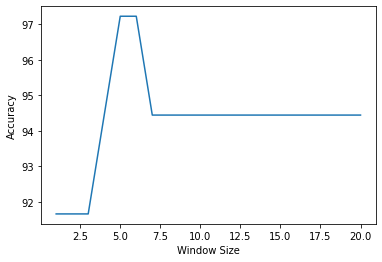

In [45]:
import matplotlib.pyplot as plt
plt.plot(df4['Window'], df4['Accuracy'])
plt.xlabel('Window Size')
plt.ylabel('Accuracy')
plt.show()

### After Checking the model we can see that the Accuracy for the model peaked at 97.2 % at window size of 5 and 6, and then started dropping out, So in terms of accuracy we can say that the window size 5 and 6 are the best window sizes when it comes to accuracy 

### However, for the DTW implementation of the KNN Model, The computation time increases with each increasing Window size, as the CPU needs to do more iterations of computations in order to compute the best neighbor with each increasing window size.

### Hence if we look at the model with the perspective of both the Accuracy and the computation cost we can say that the window size 5 is the most optimum window size for the DTW Model Implementation

### Function for the Calculation of Eucledian Distance

In [14]:
import math
def Eucledian_dist(a, b):
    sum = 0
    for i in range(0, 150):
        sum = sum + (a[i] - b[i])*(a[i] - b[i])
    return math.sqrt(sum)

### Calculation of the KNN using the distance metric as the Eucledian Distance

In [15]:
#This is implementation of my Self-Defined Code for the Eucledian Distance based KNN Model model.

final = []
for i in range(0, len(X_test_arr)):
    a= {}
    for j in range(0, len(X_arr)):
        a[j] = Eucledian_dist(X_test_arr[i], X_arr[j])
    final.append(fetch_keys(a, sorted(a.values())[0])[0])  
    
print(final)              

[27, 26, 28, 20, 55, 100, 74, 95, 78, 13, 19, 42, 94, 26, 98, 2, 6, 86, 42, 45, 54, 23, 3, 37, 22, 23, 15, 93, 49, 99, 52, 23, 107, 0, 90, 4]


In [16]:
#These are the indexes in the y_train that have the smallest eucledian distance 
print(final)

[27, 26, 28, 20, 55, 100, 74, 95, 78, 13, 19, 42, 94, 26, 98, 2, 6, 86, 42, 45, 54, 23, 3, 37, 22, 23, 15, 93, 49, 99, 52, 23, 107, 0, 90, 4]


In [17]:
#Mapping of the class from the indexes of the y_train
final_1 = []
for i in range(0,len(final)):
    final_1.append(y_train[0][final[i]])
print(final_1)

[3.0, 2.0, 2.0, 2.0, 3.0, 1.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 1.0, 2.0, 2.0, 1.0, 3.0, 1.0, 2.0, 3.0, 2.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 3.0, 3.0, 1.0]


In [18]:
#Conversion of the predicted values to a dataframe
df3 = pd.DataFrame (final_1, columns = ['Predicted'])
df3

,Predicted
0,3.0
1,2.0
2,2.0
3,2.0
4,3.0
5,1.0
6,3.0
7,2.0
8,2.0
9,2.0


### Calculation of the Accuracy for the Eucledian Distance Method

In [19]:

count = 0
for i in range(0,len(df3)):
    if df3.iloc[i][0] == y_test[0][i]:
        count = count+1
accuracy_Eucledian = (count/len(df3))*100
print ('Accuracy for the Eucledian Distance method is', accuracy_Eucledian, '%')

Accuracy for the Eucledian Distance method is 94.44444444444444 %


### Accuracy comparison for the DTW Model with the Eucledian distance based model 

In [43]:
print ('Accuracy for the Eucledian Distance based model is -- ', accuracy_Eucledian, '%')
print ('Best Accuracy for the DTW Distance based model is -- ', accuracy[5], '%')

Accuracy for the Eucledian Distance based model is --  94.44444444444444 %
Best Accuracy for the DTW Distance based model is --  97.22222222222221 %


# TASK 2

### Using the Sklearn Metrics Method to Adapt the DTW Code into the Sklearn KNN Method

In [32]:
def dtw_1(s, t, window = 5):
    n, m = len(s), len(t)
    w = np.max([window, abs(n-m)]) # warping cannot be less than the difference in lengths. 
    dtw_matrix = np.zeros((n+1, m+1))
    
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            dtw_matrix[i, j] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix[-1,-1]

In [33]:
#Implementation of the SKLEARN KNN Method
from sklearn.neighbors import KNeighborsClassifier
KNN_1 = KNeighborsClassifier(n_neighbors = 1 , metric = dtw_1)
KNN_1.fit(X_train,y_train)

C:\Users\Puru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric=<function dtw_1 at 0x000001E25E227790>,
                     n_neighbors=1)

### Accuracy Calculation for the Sklearn KNN Classifier

In [34]:
#Checking if the SKLEARN Accuracy is consistent with my Function defined KNN Method
from sklearn.metrics import accuracy_score
predicted_1 = KNN_1.predict(X_test)
acc_1 = accuracy_score(y_test, predicted_1)

In [41]:
print('Accuracy for SKLEARN based DTW model for window size 5 is ', acc_1*100 , '%')

Accuracy for SKLEARN based DTW model for window size 5 is  97.22222222222221 %


In [35]:
from sklearn import metrics
confusion_matrix_1 = metrics.confusion_matrix(y_test, predicted_1)
confusion_matrix_1

array([[16,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]], dtype=int64)

### Comparing the Accuracy of the sklearn based DTW Model and Self-Implemeted DTW Model to check the consistency of both the models 

In [38]:
print('SKLEARN Accuracy for window Size 5 is', acc_1*100)
print ('1-NN Self Defined function Acuuracy for window size 5 is', accuracy[5])

SKLEARN Accuracy for window Size 5 is 97.22222222222221
1-NN Self Defined function Acuuracy for window size 5 is 97.22222222222221


### Implementation of Eucledian Distance based KNN Model using Sklearn

In [27]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train,y_train)

C:\Users\Puru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

### Predicting the Values for X_test using Sklearn Eucledian based KNN

In [28]:
predicted = KNN.predict(X_test)

### Calculating the Accuracy Scores for the Sklearn Eucledian Based KNN

In [29]:
acc = accuracy_score(y_test, predicted)
print ('Accuracy for the Eucledian Distance method using Sklearn Class is also', acc*100, '%')

Accuracy for the Eucledian Distance method using Sklearn Class is also 94.44444444444444 %


In [30]:
#Printing out the Confusion matrix for the Eucledian distance method
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
confusion_matrix

array([[15,  1,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]], dtype=int64)

### Comparing the self-implemented Eucledian based model with Sklearn based Eucledian distance model

In [31]:
print ('Accuracy for the Eucledian Distance method using Sklearn Class is also', acc*100, '%')
print ('Accuracy for the Self-Implemented 1-NN Eucledian Distance based KNN method is', accuracy_Eucledian, '%')

Accuracy for the Eucledian Distance method using Sklearn Class is also 94.44444444444444 %
Accuracy for the Self-Implemented 1-NN Eucledian Distance based KNN method is 94.44444444444444 %


# Findings and Conclusion:

## 1. First I implemented my simple 1-NN Classifier Model and found out that the accuracy of the Model was 97.2 % for the best window size of 5

## 2. The Accuracy increased with the increase in the Window size, However it dropped back again after the window size 6  .

## 3. The Computation time increased with the Increase in Window size as the CPU had to perform more computation with the increased window size for the DTW based Classifier in order to find out the best neigbour.

## 4. Eucledian distance simply calculates the Eucledian distance between the 2 Arrays passed as Input, Unlike the DTW Classifier the computation time was lesser as compared to the DTW based model as the CPU did not had to go through checking of many to one data points in order to find out the best fit, It just computed the distance directly with the corresponding Time series column, However in this model we had to compromise a little bit with the Accuracy of the Model as for the Eucledian Distance based model the Accuracy dropped out to be 94.4 %

## 5. I also Checked the consistency of my code for my self-Implemented KNN Classifier and the sklearn based KNN Classifier and found out that the Accuracy of my model was consistent with that of the sklearn based models for both the DTW and the Eucledian Distance based models signfying that the piece of code written by me was correct.

## 6. The Window size is not some constant parameter for the particular dataset, It keeps on changing with the different test train splits and hence needs to be computed for each test train split.

## DTW version of the KNN method is holds advantage over the Eucledian distance as in Eucledian distance model we can only make one to one comparisons while classifying the data, However in DTW we can make many to one comparisons of the data points, DTW checks many data points as per the Window size and then finds the best possible Alignment, making it a more suitable algorithm while working with data like time-series, Speech data etc